<a href="https://colab.research.google.com/github/tiwars10/Analytics/blob/master/pyramid_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings

In [0]:
import pandas as pd

In [0]:
from matplotlib import pyplot as plt
import collections
import warnings
import pandas_profiling
import numpy as np


In [0]:
import itertools

In [0]:
import seaborn as sns

In [0]:
import scipy

In [0]:
%matplotlib inline

In [0]:
from matplotlib.pylab import rcParams

In [0]:
import statsmodels.api as sm

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [0]:
!pip install pmdarima

     |████████████████████████████████| 921kB 2.9MB/s 
     |████████████████████████████████| 24.8MB 46.5MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.1
    Uninstalling scipy-1.3.1:
      Successfully uninstalled scipy-1.3.1


In [0]:
import pmdarima as pm

In [0]:
from sklearn import metrics

In [0]:
from pmdarima import auto_arima

In [0]:
warnings.filterwarnings('ignore')

In [0]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [0]:
flight_data=sns.load_dataset("flights")

In [0]:
flight_data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [0]:
flight_data.tail()

,year,month,passengers
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390
143,1960,December,432


In [0]:
flight_data.shape

(144, 3)

In [0]:
flight_data.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [0]:
flight_data.info

<bound method DataFrame.info of      year      month  passengers
0    1949    January         112
1    1949   February         118
2    1949      March         132
3    1949      April         129
4    1949        May         121
5    1949       June         135
6    1949       July         148
7    1949     August         148
8    1949  September         136
9    1949    October         119
10   1949   November         104
11   1949   December         118
12   1950    January         115
13   1950   February         126
14   1950      March         141
15   1950      April         135
16   1950        May         125
17   1950       June         149
18   1950       July         170
19   1950     August         170
20   1950  September         158
21   1950    October         133
22   1950   November         114
23   1950   December         140
24   1951    January         145
25   1951   February         150
26   1951      March         178
27   1951      April         163
28   1951  

Create Pivot Table using Pandas Pivot Table method

In [0]:
flight_data_pivot=flight_data.pivot('month','year','passengers')

In [0]:
flight_data_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [0]:
plt.figure(figsize=(15,5))

<Figure size 1080x360 with 0 Axes>

<Figure size 1080x360 with 0 Axes>

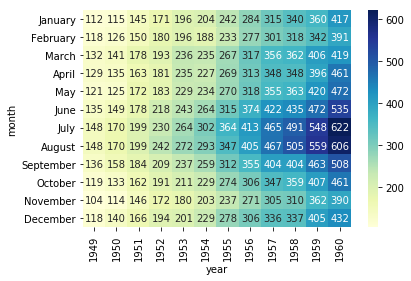

In [0]:
sns.heatmap(flight_data_pivot,annot=True,fmt="d",cmap="YlGnBu")

In [0]:
plt.show()

In [0]:
month=pd.date_range('19490131',periods=144,freq='M')

In [0]:
month

DatetimeIndex(['1949-01-31', '1949-02-28', '1949-03-31', '1949-04-30',
               '1949-05-31', '1949-06-30', '1949-07-31', '1949-08-31',
               '1949-09-30', '1949-10-31',
               ...
               '1960-03-31', '1960-04-30', '1960-05-31', '1960-06-30',
               '1960-07-31', '1960-08-31', '1960-09-30', '1960-10-31',
               '1960-11-30', '1960-12-31'],
              dtype='datetime64[ns]', length=144, freq='M')

In [0]:
flight_data['datestamp']=month

In [0]:
flight_data.head()

,year,month,passengers,datestamp
0,1949,January,112,1949-01-31
1,1949,February,118,1949-02-28
2,1949,March,132,1949-03-31
3,1949,April,129,1949-04-30
4,1949,May,121,1949-05-31


In [0]:
data=flight_data.loc[:,('datestamp','passengers')]

In [0]:
data.head()

,datestamp,passengers
0,1949-01-31,112
1,1949-02-28,118
2,1949-03-31,132
3,1949-04-30,129
4,1949-05-31,121


In [0]:
data.describe()

,passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [0]:
data.set_index('datestamp',inplace=True)

In [0]:
data.head()

,passengers
datestamp,
1949-01-31,112
1949-02-28,118
1949-03-31,132
1949-04-30,129
1949-05-31,121


In [0]:
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

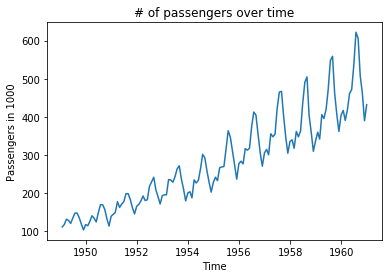

In [0]:
plt.plot(data)
plt.xlabel('Time')
plt.ylabel('Passengers in 1000')
plt.title('# of passengers over time')
plt.show;

In [0]:
decomposition=seasonal_decompose(data,model='multiplicative')

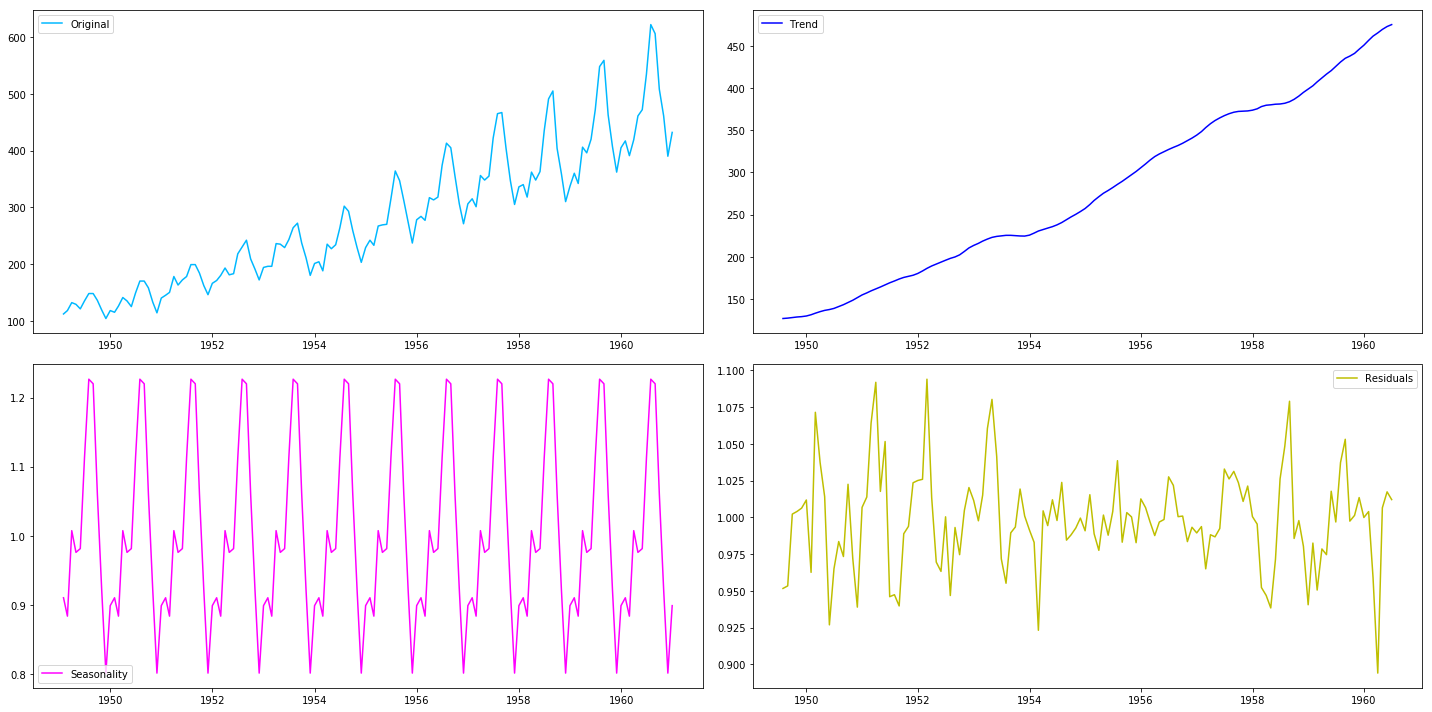

In [0]:
plt.figure(figsize=(20,10))

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(221)
plt.plot(data,color='#00b8ff',label='Original')
plt.legend(loc='best')

plt.subplot(222)
plt.plot(trend,'b',label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal,color='#ff00ff',label='Seasonality')
plt.legend(loc='best')

plt.subplot(224)
plt.plot(residual,'y',label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show();


In [0]:
decomposition=seasonal_decompose(data,model='additive')

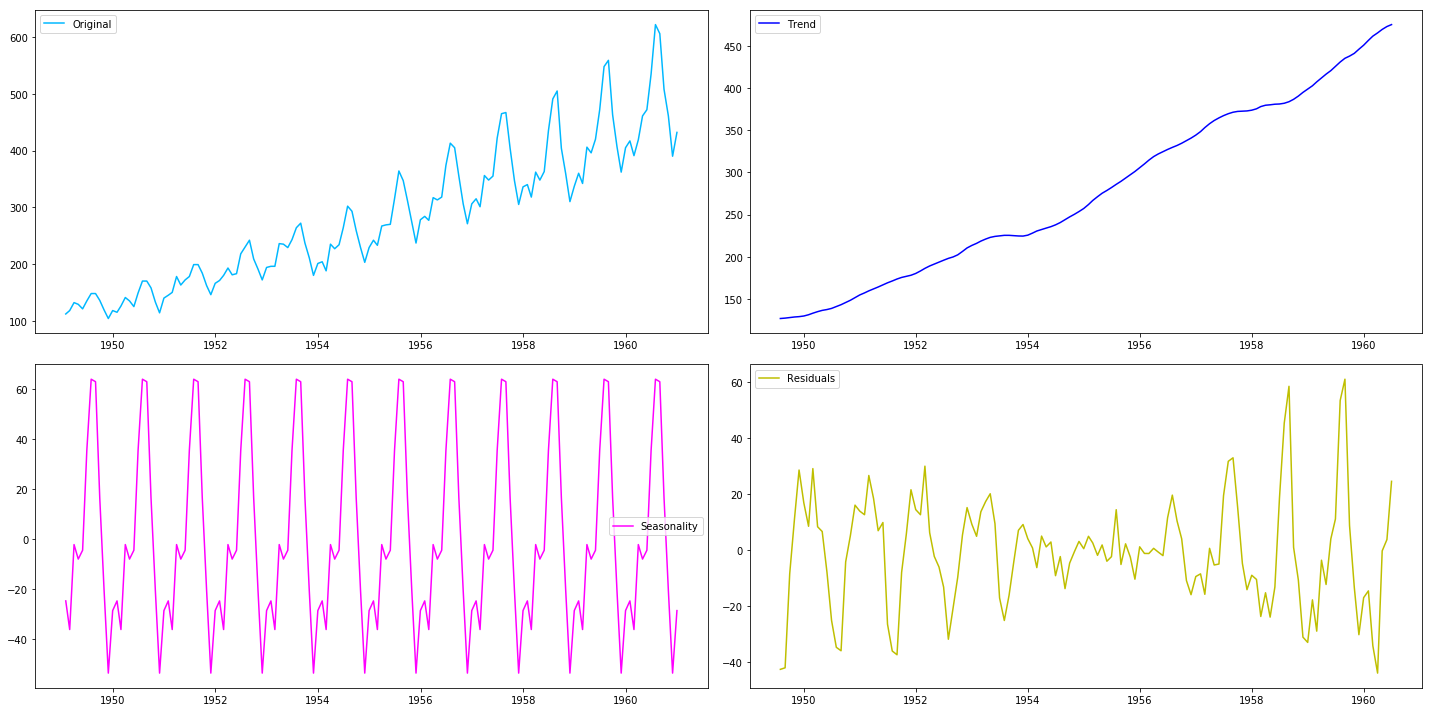

In [0]:
plt.figure(figsize=(20,10))

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(221)
plt.plot(data,color='#00b8ff',label='Original')
plt.legend(loc='best')

plt.subplot(222)
plt.plot(trend,'b',label='Trend')
plt.legend(loc='best')

plt.subplot(223)
plt.plot(seasonal,color='#ff00ff',label='Seasonality')
plt.legend(loc='best')

plt.subplot(224)
plt.plot(residual,'y',label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show();

In [0]:
from pmdarima.arima.stationarity import ADFTest
adf_test=ADFTest(alpha=0.05)
adf_test.is_stationary(data)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.01, False)

In [0]:
adf_test?

In [0]:
 train,test=data[:100],data[100:]
 train.shape
test.shape

(100, 1)

(44, 1)

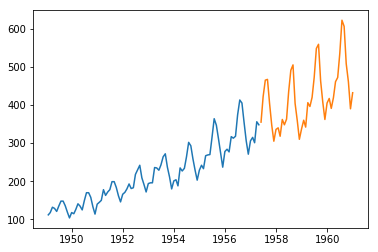

In [0]:
plt.plot(train)
plt.plot(test)
plt.show();

In [0]:
Arima_model=auto_arima(train,start_p=1,start_q=1,max_p=8,max_q=8,
                      start_P=0,start_Q=0,max_P=8,max_Q=8,
                      m=12,seasonal=True,trace=True,d=1,D=1,
                      error_action='warn',supress_warnings=True,
                      stepwise=True,random_state=20,n_fits=30)
Arima_model.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=649.156, BIC=659.019, Fit time=0.263 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=652.680, BIC=657.612, Fit time=0.021 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=645.940, BIC=655.803, Fit time=0.372 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=646.447, BIC=656.311, Fit time=0.424 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=647.792, BIC=655.190, Fit time=0.106 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=647.914, BIC=660.244, Fit time=1.076 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=647.927, BIC=660.257, Fit time=0.563 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=646.264, BIC=661.060, Fit time=4.396 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=649.280, BIC=656.678, Fit time=0.232 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -318.970
Date:                            Sat, 24 Aug 2019   AIC                            645.940
Time:                                    07:21:44   BIC                            655.803
Sample:                                         0   HQIC                           649.912
                                            - 100                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5341      1.082      0.493      0.622      -1.587       2.656
ar.L1         -0.2456      0.097     -2.534      0.011      -0.436      -0.056
ar.S.L12      -0.2141      0.088     -2.432      0.015      -0.387      -0.042
sigma2        88.9071     15.058      5.904      0.000      59.394     118.420
===================================================================================
Ljung-Box (Q):                       39.29   Jarque-Bera (JB):                 2.40
Prob(Q):                              0.50   Prob(JB):                         0.30
Heteroskedasticity (H):               1.34   Skew:                             0.40
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [0]:
prediction=pd.DataFrame(Arima_model.predict(n_periods=44),index=test.index)
prediction.colunms=['Predicted_Passengers']

In [0]:
prediction

,0
datestamp,
1957-05-31,353.975616
1957-06-30,407.704154
1957-07-31,449.359026
1957-08-31,439.839752
1957-09-30,393.485773
1957-10-31,347.268866
1957-11-30,312.269685
1957-12-31,348.983251
1958-01-31,357.769639


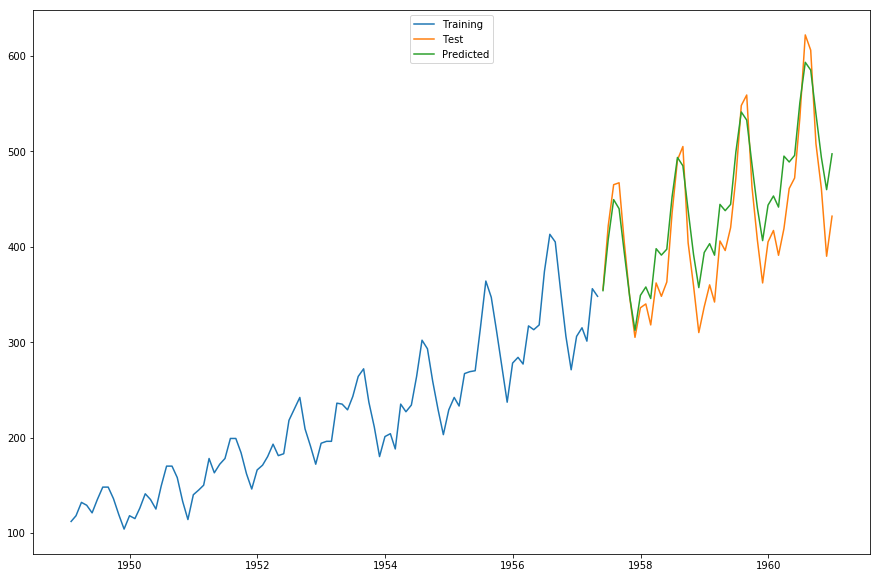

In [0]:
plt.figure(figsize=(15,10))
plt.plot(train,label='Training')
plt.plot(test,label='Test')
plt.plot(prediction,label='Predicted')
plt.legend(loc='upper center')
plt.show();

In [0]:
test['Predicted_Passengers']=prediction
test['Error']=test['passengers']-test['Predicted_Passengers']
test

,passengers,Predicted_Passengers,Error
datestamp,,,
1957-05-31,355,353.975616,1.024384
1957-06-30,422,407.704154,14.295846
1957-07-31,465,449.359026,15.640974
1957-08-31,467,439.839752,27.160248
1957-09-30,404,393.485773,10.514227
1957-10-31,347,347.268866,-0.268866
1957-11-30,305,312.269685,-7.269685
1957-12-31,336,348.983251,-12.983251
1958-01-31,340,357.769639,-17.769639


In [0]:
metrics.mean_absolute_error(test.passengers,test.Predicted_Passengers)

30.332855532058378

In [0]:
metrics.mean_squared_error(test.passengers,test.Predicted_Passengers)

1220.5462974520162

In [0]:
metrics.median_absolute_error(test.passengers,test.Predicted_Passengers)

28.25791340117226

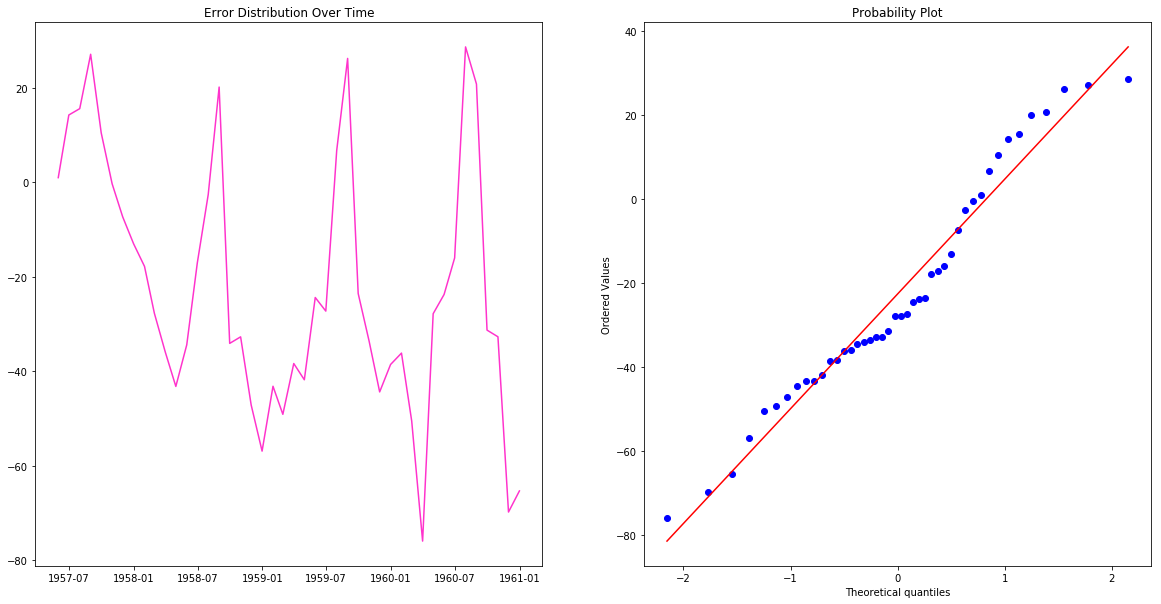

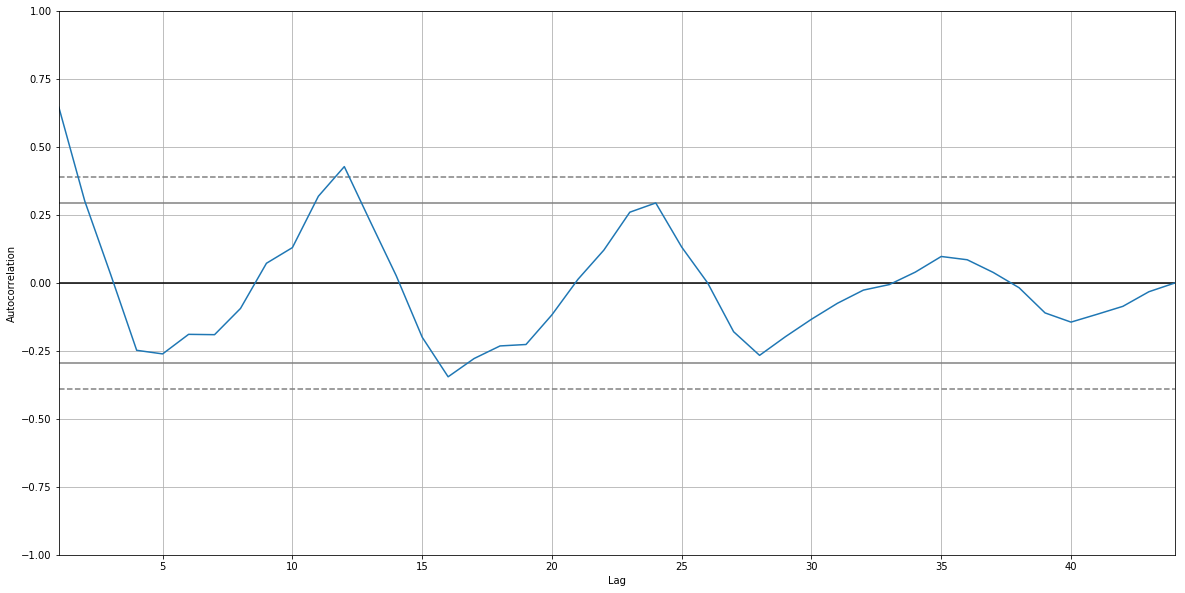

In [0]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(test.Error,color='#ff33cc')
plt.title('Error Distribution Over Time')
plt.subplot(122)
scipy.stats.probplot(test.Error,plot=plt)
plt.show();

plt.figure(figsize=(20,10))
pm.autocorr_plot(test.Error)
plt.show();